LSTM implementation on Appliances Consumption Data

In [2]:
# Load all required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from tensorflow import keras 

from sklearn.preprocessing import StandardScaler
from keras.models import Sequential

from keras.layers import Dense, LSTM
import numpy as np

from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
# Load appliances cosumption data from uci machine leanring repository

Appliance_Consumption= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [4]:
Appliance_Consumption

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [5]:
# Data set has large number of features along with consumption So individual features analysis needs to be made whether or not it will be useful for multivariate analysis.
Appliance_Consumption.shape

(19735, 29)

In [6]:
# Convert the date column to a datetime data type
Appliance_Consumption['date'] = pd.to_datetime(Appliance_Consumption['date'])

# Set the index of the DataFrame as the date column
Appliance_Consumption.set_index('date', inplace=True)

In [7]:
# Check for null values or nan values in data since lstm cannot handle these values
Appliance_Consumption.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [8]:
Appliance_Consumption.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

Attribute Information:

date time year-month-day hour:minute:second

Appliances, 

energy use in Wh lights, 

energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

In [9]:
# Since there are lot of columns to kickstart the feature engineering process lets first understand the corelation of appliances consumption with all other columns in the datset

corr_matrix = Appliance_Consumption.corr()['Appliances']

corr_matrix

Appliances     1.000000
lights         0.197278
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2          -0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
RH_4           0.016965
T5             0.019760
RH_5           0.006955
T6             0.117638
RH_6          -0.083178
T7             0.025801
RH_7          -0.055642
T8             0.039572
RH_8          -0.094039
T9             0.010010
RH_9          -0.051462
T_out          0.099155
Press_mm_hg   -0.034885
RH_out        -0.152282
Windspeed      0.087122
Visibility     0.000230
Tdewpoint      0.015353
rv1           -0.011145
rv2           -0.011145
Name: Appliances, dtype: float64

In [10]:
effective_columns=['Appliances','lights', 'T1', 'RH_1' , 'T2' , 'RH_2' , 'T4', 'RH_4' , 'T_out' ,'RH_out','T8','RH_8','T9','RH_9','T_out' ]
len(effective_columns)

15

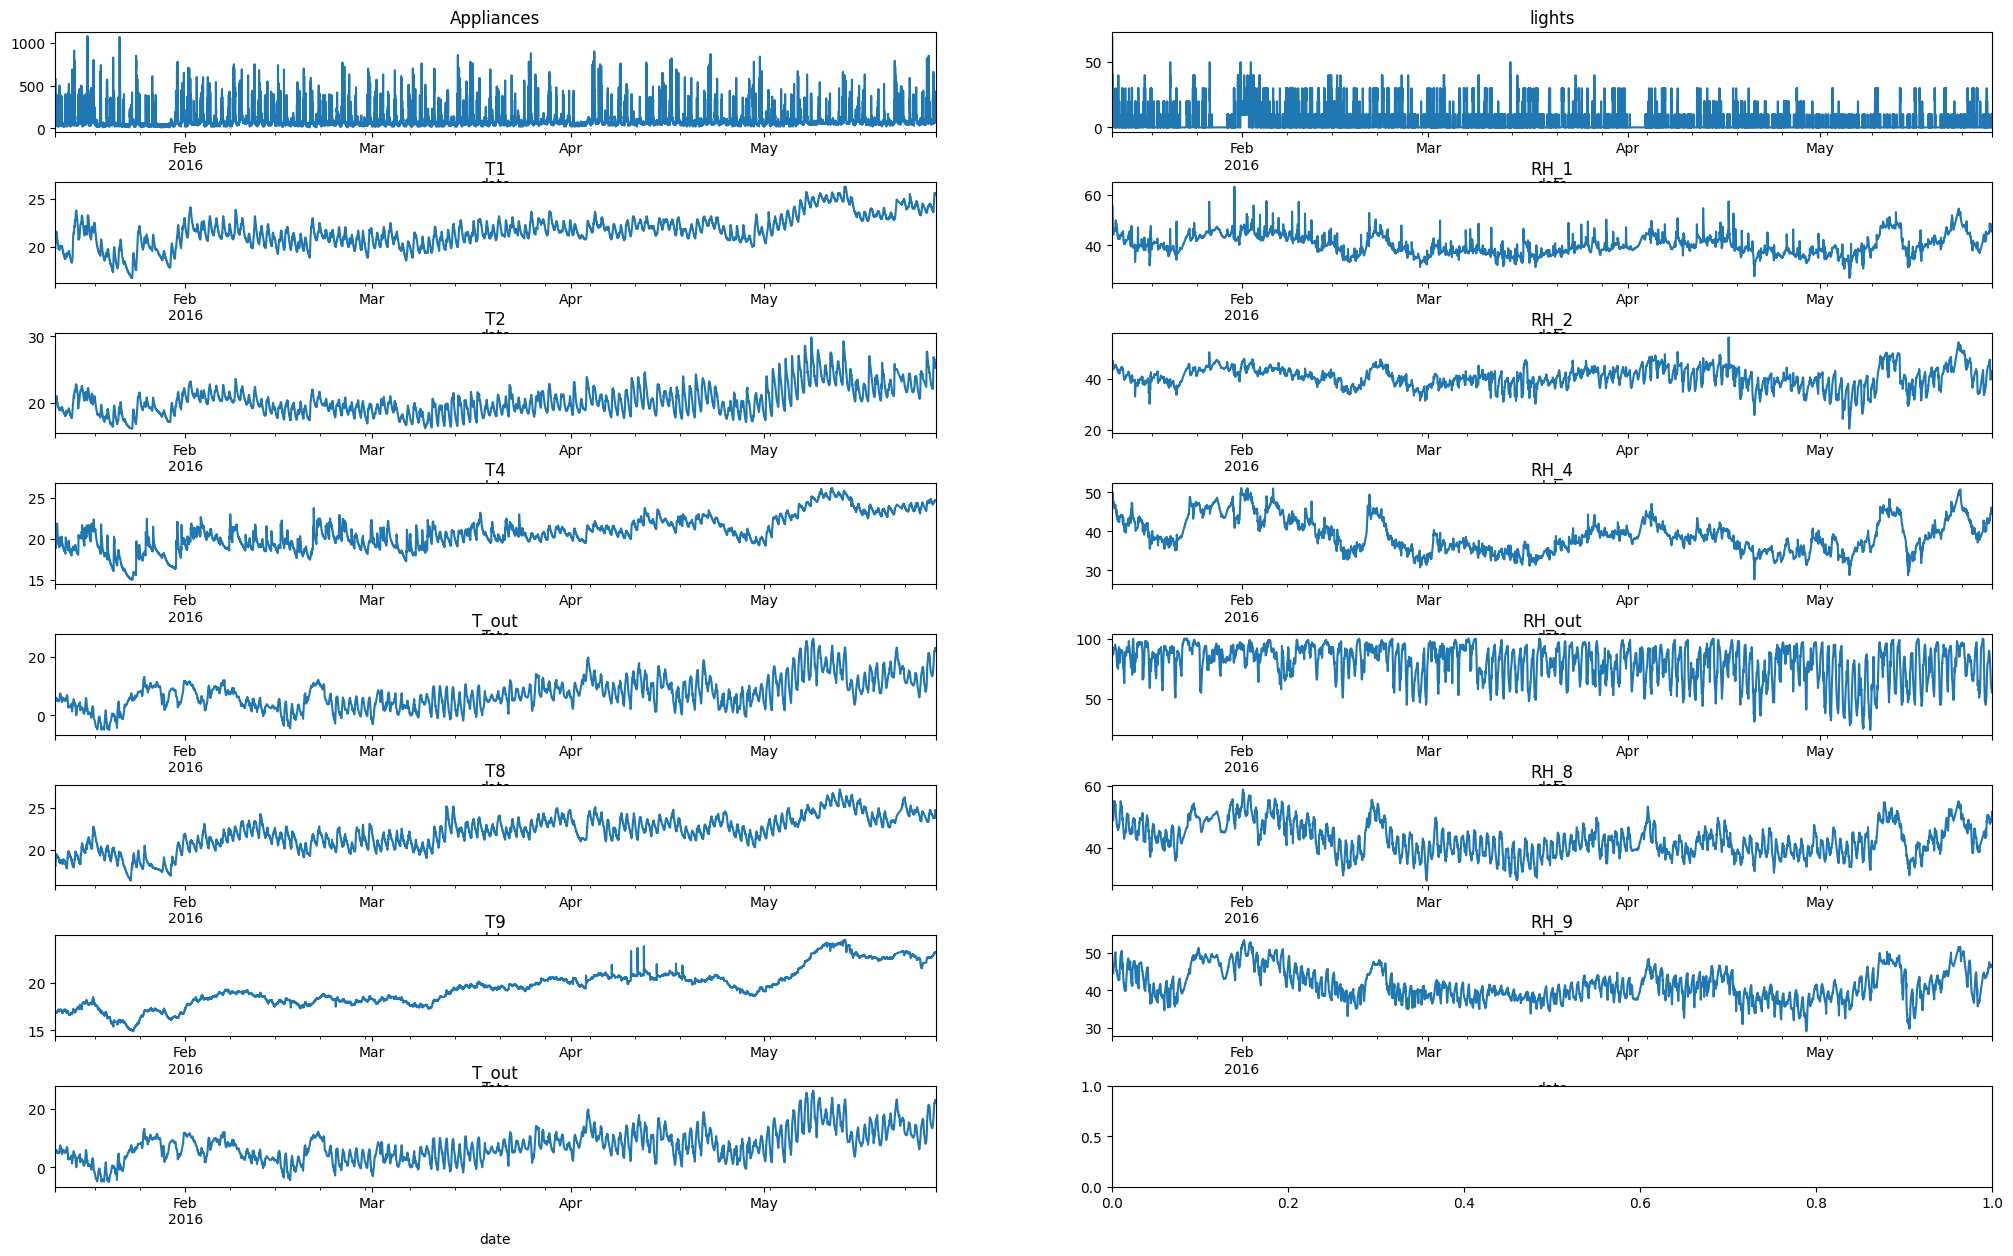

In [11]:
# checking the distributions for effective  columns 

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(25, 15))
axe=axes.ravel()

for i, col in enumerate(effective_columns):
    Appliance_Consumption[col].plot(ax=axe[i])
    axe[i].set_title(col)
    
fig.subplots_adjust(hspace=0.5)

In [12]:
# Checking for outliers

for item in effective_columns:
    col_data = Appliance_Consumption[item]
    Q1 = col_data.quantile(0.05)
    Q3 = col_data.quantile(0.90)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
    print(f'Colname {item} : count {len(outliers)}' )
    print(F'Lower bound {item} {Q1}')
    print(F'upper bound {item} {Q3}')
    print('\n')

Colname Appliances : count 409
Lower bound Appliances 30.0
upper bound Appliances 196.00000000002183


Colname lights : count 2
Lower bound lights 0.0
upper bound lights 20.0


Colname T1 : count 0
Lower bound T1 19.1
upper bound T1 23.963333333333296


Colname RH_1 : count 1
Lower bound RH_1 34.7
upper bound RH_1 45.7


Colname T2 : count 0
Lower bound T2 17.3233333333333
upper bound T2 23.331200000000003


Colname RH_2 : count 0
Lower bound RH_2 33.43233333333331
upper bound RH_2 45.22733333333333


Colname T4 : count 0
Lower bound T4 17.79
upper bound T4 23.79


Colname RH_4 : count 0
Lower bound RH_4 33.0
upper bound RH_4 45.5


Colname T_out : count 0
Lower bound T_out -0.3
upper bound T_out 14.55


Colname RH_out : count 0
Lower bound RH_out 51.0
upper bound RH_out 95.6666666666667


Colname T8 : count 0
Lower bound T8 18.3566666666667
upper bound T8 24.456


Colname RH_8 : count 0
Lower bound RH_8 35.258199999999995
upper bound RH_8 50.374000000000045


Colname T9 : count 0
Lowe

There are no extreme outlier values

In [13]:
Appliance_Consumption.shape

(19735, 28)

<Axes: xlabel='date'>

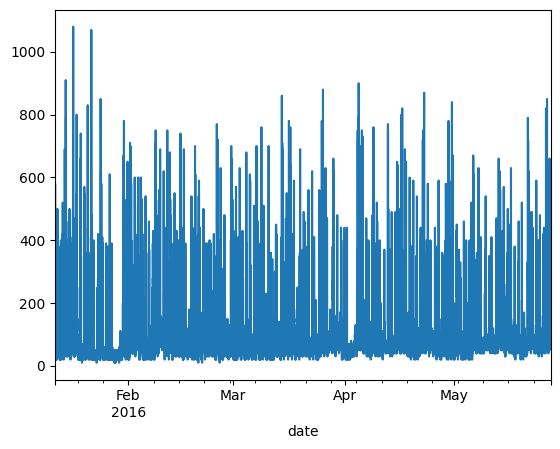

In [14]:
Appliance_Consumption['Appliances'].plot()

In [15]:
# prepare data for building the model

In [16]:
print(Appliance_Consumption.isnull().sum())

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


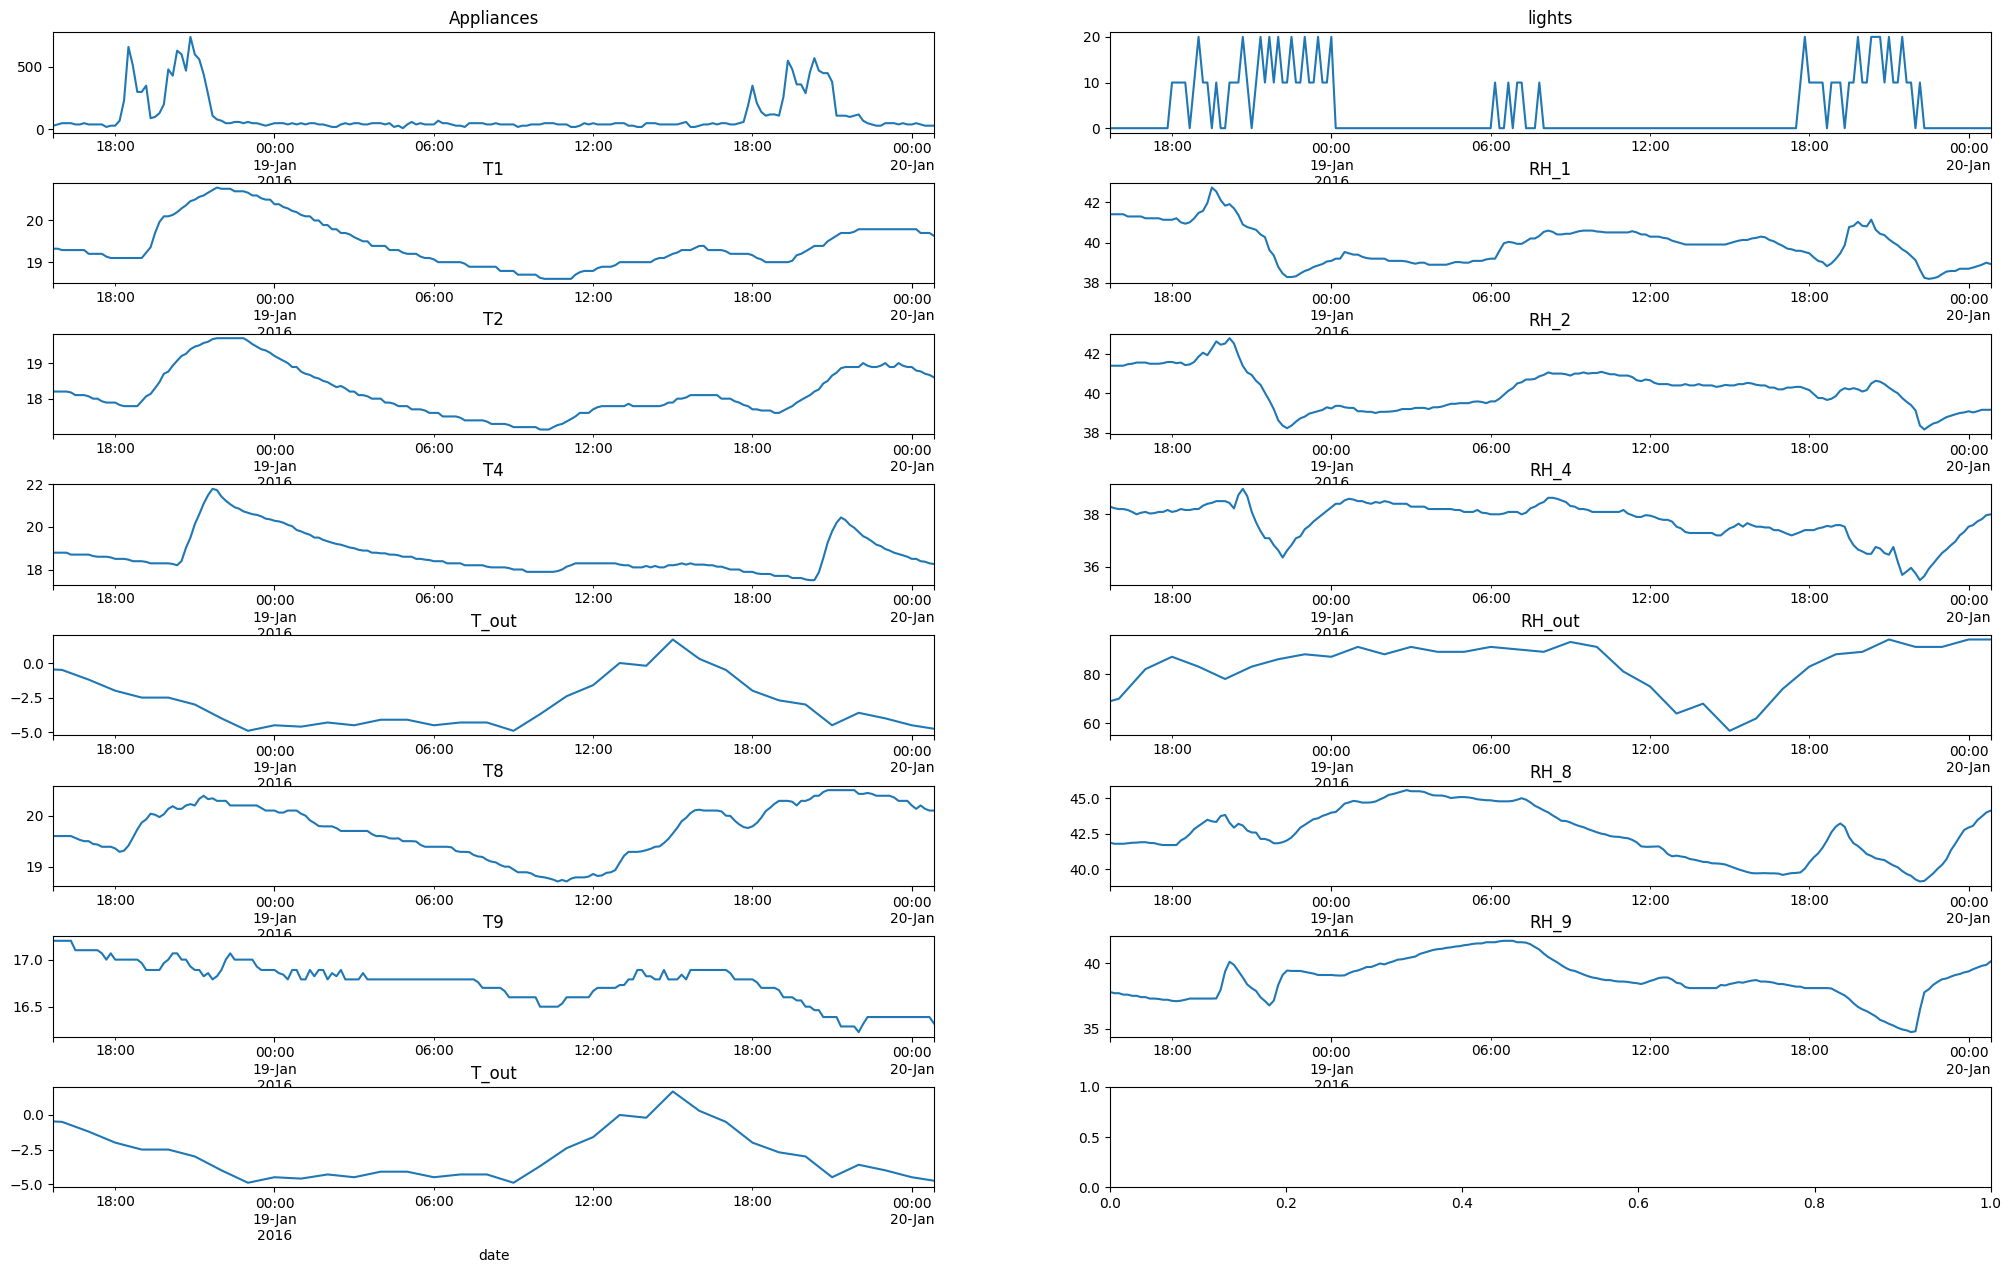

In [17]:
# checking the distributions for effective  columns 

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(25, 15))
axe=axes.ravel()

for i, col in enumerate(effective_columns):
    Appliance_Consumption[col][1000:1200].plot(ax=axe[i])
    axe[i].set_title(col)
    
fig.subplots_adjust(hspace=0.5)


<Axes: xlabel='date'>

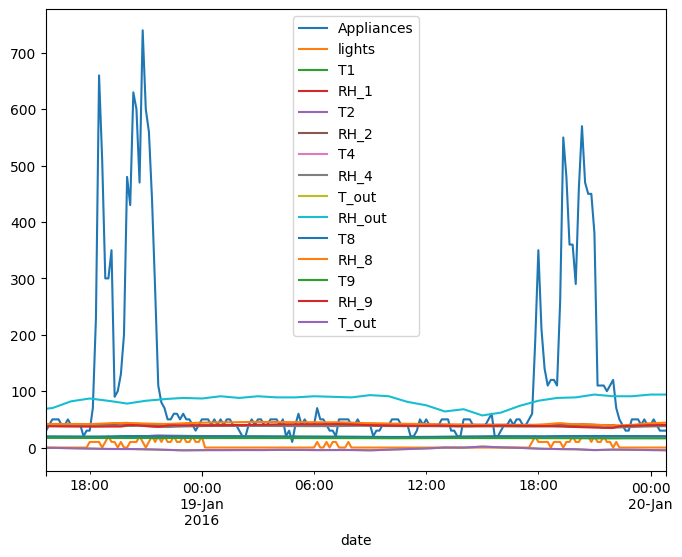

In [18]:
# analysisng the data at random ranges
Appliance_Consumption.iloc[1000:1200].plot(y=['Appliances','lights', 'T1', 'RH_1' , 'T2' , 'RH_2' , 'T4', 'RH_4' , 'T_out' ,'RH_out','T8','RH_8','T9','RH_9','T_out' ], figsize=(8, 6))

In [19]:
Appliance_Consumption.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [20]:
# effective columns
Appliance_Consumption_Filtered=Appliance_Consumption.filter(items=['Appliances','lights', 'T1', 'RH_1' , 'T2' , 'RH_2' , 'T4', 'RH_4' , 'T8','RH_8','T9','RH_9' ])

In [21]:
Appliance_Consumption_Filtered.head(5)

,Appliances,lights,T1,RH_1,T2,RH_2,T4,RH_4,T8,RH_8,T9,RH_9
date,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.000000,45.566667,18.2,48.900000,17.033333,45.53
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.000000,45.992500,18.2,48.863333,17.066667,45.56
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,18.926667,45.890000,18.2,48.730000,17.000000,45.50
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,18.890000,45.723333,18.1,48.590000,17.000000,45.40
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,18.890000,45.530000,18.1,48.590000,17.000000,45.40


In [22]:
# Scaling operation for entire dataset
scaler = StandardScaler()
scaler = scaler.fit(Appliance_Consumption_Filtered)
Appliance_Consumption_Scaled = scaler.transform(Appliance_Consumption_Filtered)

In [23]:
Appliance_Consumption_Filtered.iloc[:,0]

date
2016-01-11 17:00:00     60
2016-01-11 17:10:00     60
2016-01-11 17:20:00     50
2016-01-11 17:30:00     50
2016-01-11 17:40:00     60
                      ... 
2016-05-27 17:20:00    100
2016-05-27 17:30:00     90
2016-05-27 17:40:00    270
2016-05-27 17:50:00    420
2016-05-27 18:00:00    430
Name: Appliances, Length: 19735, dtype: int64

In [24]:
# Scaling operation for target variable this operation was seperatley done for target variable beacuse we are predicting single target variable which has only one dimension in order to do inverse 
# transformation of the data for single target column scaler object which was used to scale entire dataset cannot be used because it 16 dimensions.

Appliance_Consumption_target= Appliance_Consumption_Filtered.iloc[:,0]
Appliance_Consumption_target_array = np.array(Appliance_Consumption_target)
Appliance_Consumption_target_arrayy_reshaped = Appliance_Consumption_target_array.reshape(-1,1)

In [25]:
scaler_target = StandardScaler()
scaler_target = scaler_target.fit(Appliance_Consumption_target_arrayy_reshaped)
Appliance_Consumption_Target_Scaled = scaler_target.transform(Appliance_Consumption_target_arrayy_reshaped)

In [26]:
Appliance_Consumption_Scaled

array([[-0.36767572,  3.30126384, -1.11864475, ...,  1.14157236,
        -1.21732362,  0.95813624],
       [-0.36767572,  3.30126384, -1.11864475, ...,  1.13455378,
        -1.20077824,  0.96536273],
       [-0.46521548,  3.30126384, -1.11864475, ...,  1.10903167,
        -1.23386899,  0.95090975],
       ...,
       [ 1.68065927,  0.78103476,  2.37445166, ...,  1.28704839,
         1.84357131,  1.26164888],
       [ 3.14375569,  0.78103476,  2.37445166, ...,  1.2600109 ,
         1.84357131,  1.26827316],
       [ 3.24129545,  0.78103476,  2.37445166, ...,  1.30159599,
         1.84357131,  1.27489745]])

In [27]:
Appliance_Consumption_Scaled[2,0]

-0.46521548452351774

In [28]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length):
        X.append(data[i:i+seq_length, :])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)

In [29]:
# Datset has 10 mins frequency data so expermeneting with sequence length 40

seq_length=40

In [30]:
# create sequences of input data and target data
X, Y = create_sequences(Appliance_Consumption_Scaled, seq_length)

In [31]:
X.shape

(19695, 40, 12)

In [32]:
# create training and testing sets
train_size = int(len(X) * 0.96)
X_train, y_train = X[:train_size], Y[:train_size]
X_test, y_test = X[train_size:], Y[train_size:]

In [33]:
model = Sequential()
model.add(LSTM(25, return_sequences=True, input_shape=(seq_length, X.shape[2]))) 
model.add(LSTM(25, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', metrics=['mae'], loss='mse')

In [34]:
model.fit(X_train, y_train, batch_size=50, epochs=35, validation_split=0.1)

Epoch 1/35
341/341 [==============================] - 21s 47ms/step - loss: 0.6536 - mae: 0.4217 - val_loss: 0.4192 - val_mae: 0.3026
Epoch 2/35
341/341 [==============================] - 16s 47ms/step - loss: 0.4393 - mae: 0.3160 - val_loss: 0.3755 - val_mae: 0.3484
Epoch 3/35
341/341 [==============================] - 15s 44ms/step - loss: 0.4124 - mae: 0.3018 - val_loss: 0.3660 - val_mae: 0.2793
Epoch 4/35
341/341 [==============================] - 15s 45ms/step - loss: 0.4028 - mae: 0.2964 - val_loss: 0.3569 - val_mae: 0.2832
Epoch 5/35
341/341 [==============================] - 17s 50ms/step - loss: 0.3939 - mae: 0.2961 - val_loss: 0.3593 - val_mae: 0.2828
Epoch 6/35
341/341 [==============================] - 16s 47ms/step - loss: 0.3852 - mae: 0.2920 - val_loss: 0.3525 - val_mae: 0.2697
Epoch 7/35
341/341 [==============================] - 16s 46ms/step - loss: 0.3781 - mae: 0.2895 - val_loss: 0.3667 - val_mae: 0.2867
Epoch 8/35
341/341 [==============================] - 16s 47ms

In [35]:
y_pred=model.predict(X_test)

25/25 [==============================] - 1s 11ms/step


In [36]:
y_test.shape

(788,)

In [37]:
y_pred.shape

(788, 1)

In [38]:
# revert back to original values
y_test = scaler_target.inverse_transform(y_test.reshape(-1,1))
y_pred = scaler_target.inverse_transform(y_pred)

In [41]:
mse = mean_squared_error(y_test, y_pred)

mean_abs=mean_absolute_error(y_test,y_pred)
# calculate the root mean squared error
rmse = np.sqrt(mse)

# calculate the range of the true values
y_range = np.max(y_test) - np.min(y_test)

# calculate the normalized root mean squared error
nrmse = np.sqrt(mse) / y_range

#print(f'nrmse : {nrmse}')
print(f'mse: {mse}')
print(f'mean_absoluter error {mean_abs}')
print(f'rmse {rmse}')

mse: 6511.889243548062
mean_absoluter error 37.25498291441632
rmse 80.69627775522278
